In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                      mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(mini_pieman.all()), num_factors=100,
                                                  mask='data/pieman_data/wholebrain.nii.gz')

05/16/2018 15:10:20 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 15:10:22 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 15:10:23 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


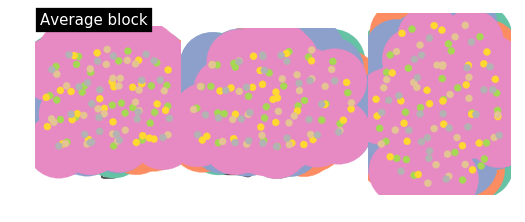

In [20]:
htfa.plot_factor_centers()

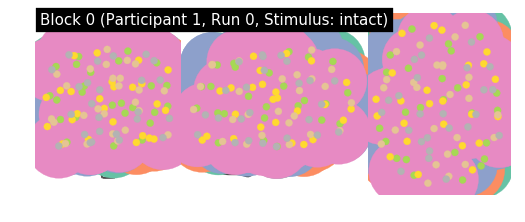

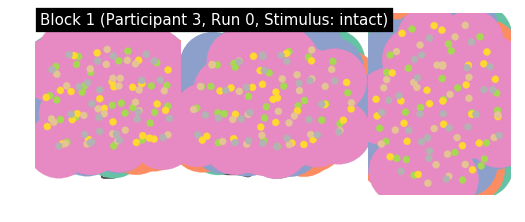

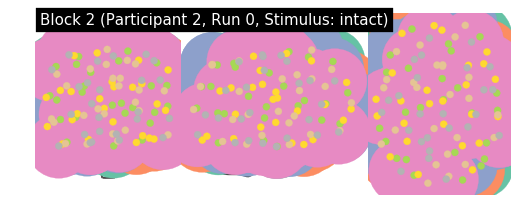

In [ ]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)

In [ ]:
losses = htfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, blocks_batch_size=8)

In [ ]:
utils.plot_losses(losses)

In [ ]:
htfa.normalize_weights()

In [ ]:
htfa.plot_factor_centers()

In [ ]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)
    htfa.plot_original_brain(block=b)
    htfa.plot_reconstruction(block=b)